## 
Colorado 
Plots Comparisons
Tensor elevation + cell

In [35]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import cftime
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from copy import copy
import geopandas as gpd
from shapely.geometry import Point

In [36]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [37]:
import warnings
warnings.filterwarnings('ignore')

# READ EVGAM output FILES

In [38]:
yearb=1941
yeare=2025

lon_min = 288.25
lon_max = 293.75
lat_min = 42.25
lat_max = 47.5

dirin ='/Users/ghervieux/AFI'

ds0 = xr.open_dataset(f'{dirin}/NorthAmerica_ij_extremes_gev_1941_2025.nc')
ds0 = ds0.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
rl1000 = ds0['rl100']
loc0 = ds0['location'] 
scale0 = ds0['scale'] 
shape0 = ds0['shape'] 

ds1 = xr.open_dataset(f'{dirin}/Maine_DJFtas_cr10_mrf50_glostmrf12_loc_sc_sh_1941_2025.nc')
rl1001 = ds1['rl100'] 
loc1 = ds1['location'] 
scale1 = ds1['scale'] 
shape1 = ds1['shape'] 

units = 'degree-days (°C)'

Tlabels = ['extRemes (independent)','Evgam (space + time covariates)']

##
Evgam :    covariates: Mean Winter Temperature (DJFtas), Global Land and Ocean Average Temperature Anomalies (GLOST)

formula_gev <- list(AFI 

~ s(DJFtas,bs="cr",k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) + s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) ,

~ s(DJFtas,bs="cr",k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) + s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) , 

~ s(DJFtas,bs='cr',k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) )

In [39]:
rl1000 = rl1000.expand_dims({'time':ds1['time']})
loc0 = loc0.expand_dims({'time':ds1['time']})
scale0 = scale0.expand_dims({'time':ds1['time']})
shape0 = shape0.expand_dims({'time':ds1['time']})

In [40]:
Trl100 = [rl1000.where(rl1000!=-99999.), rl1001]
Tloc = [loc0.where(loc0!=-99999.), loc1]
Tscale = [scale0.where(scale0!=-99999.), scale1]
Tshape = [shape0.where(shape0!=-99999.), shape1]


In [41]:
dshgt = xr.open_dataset('/Users/ghervieux/AFI/hgt.sfc.era5.1.nc')
dshgt = dshgt.sortby('lat')
dshgt = dshgt.isel(time=0, drop=True)

# Reduce domain for testing purpose

In [42]:

dshgt = xr.open_dataset('/Users/ghervieux/AFI/hgt.sfc.era5.1.nc')
dshgt = dshgt.sortby('lat')
dshgt = dshgt.isel(time=0, drop=True)
dshgt = dshgt.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
elevation = dshgt['hgt']


[Text(0, 43.0, '43$\\degree$N'),
 Text(0, 44.0, '44$\\degree$N'),
 Text(0, 45.0, '45$\\degree$N'),
 Text(0, 46.0, '46$\\degree$N'),
 Text(0, 47.0, '47$\\degree$N')]

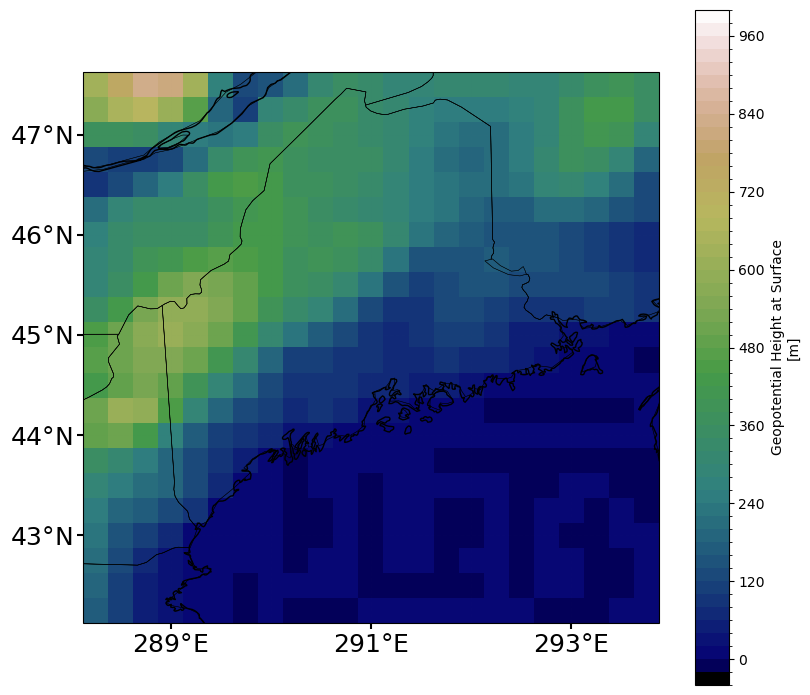

In [43]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
cc = elevation.plot.pcolormesh(ax=ax,cmap='gist_earth',levels=np.arange(-40,1020,20))
####
grd = ax.gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

ax.set_xlabel('')
ax.set_ylabel('')
ax.add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
ax.tick_params(axis='both',direction='out',width=1.5,length=4)
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
ax.coastlines()
ax.set_xticks(ax.get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
ax.set_xticklabels([f'{round(ixx+360)}$\\degree$E' for ixx in ax.get_xticks()],size=18)
ax.set_yticks(ax.get_yticks()[1:-1],crs=ccrs.PlateCarree())
ax.set_yticklabels([f'{round(ixx)}$\\degree$N' for ixx in ax.get_yticks()],size=18)

# PLOT Return Level 100

Text(0.5, 0.98, 'Return Level 100year, year=1941')

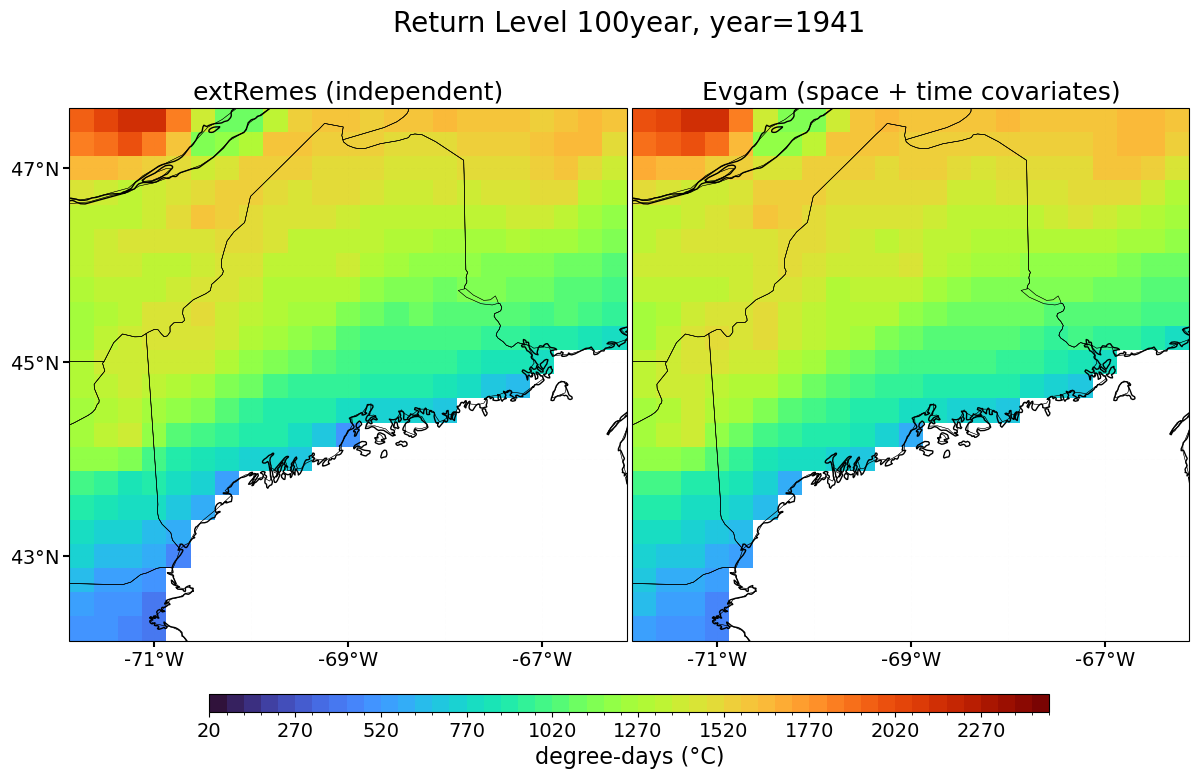

In [44]:

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Trl100[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(20,2500,50),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'{units}',fontsize=16)
plt.suptitle(f'Return Level 100year, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Return Level 100year, year=2025')

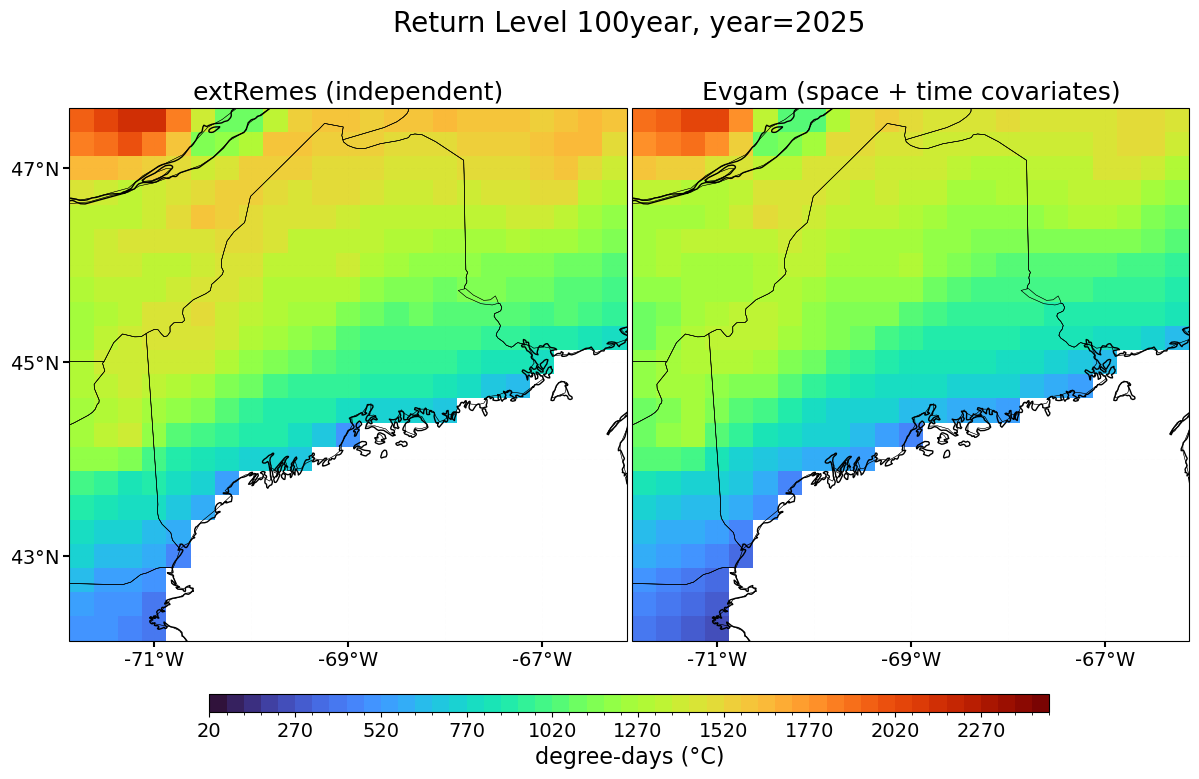

In [45]:

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Trl100[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(20,2500,50),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'{units}',fontsize=16)
plt.suptitle(f'Return Level 100year, year={yeare}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter, year=1941')

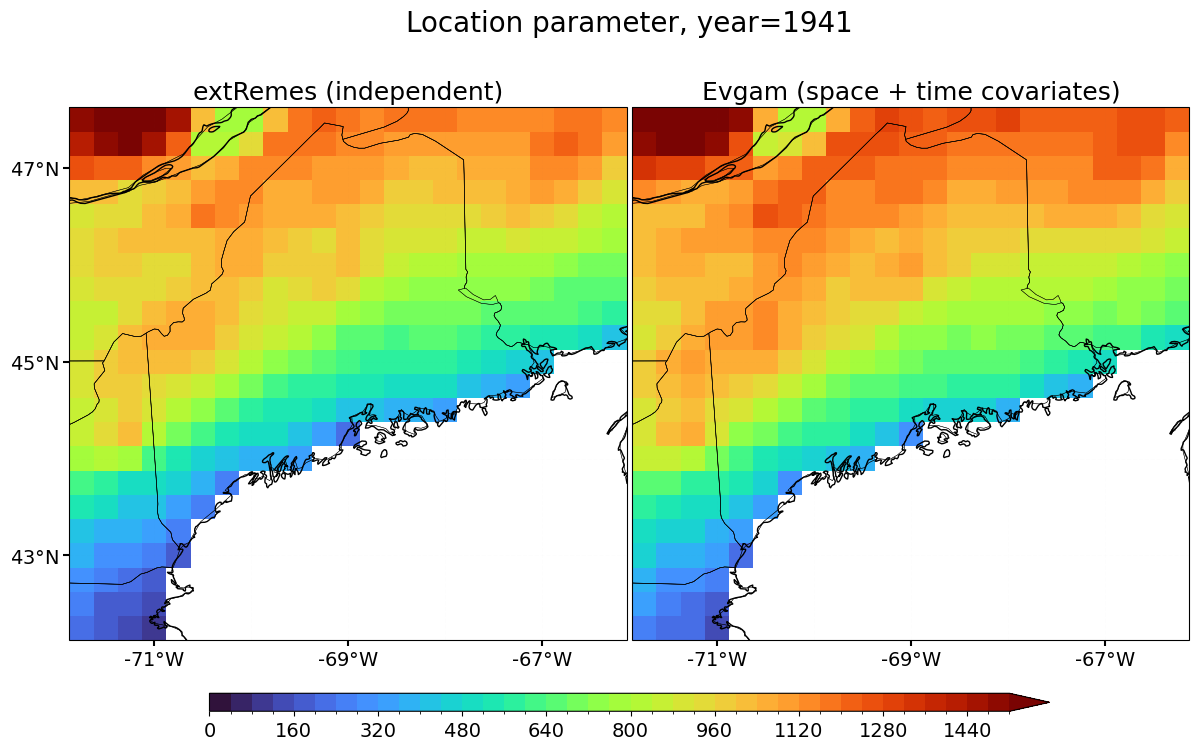

In [46]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tloc[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,1540,40),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Location parameter, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter, year=2025')

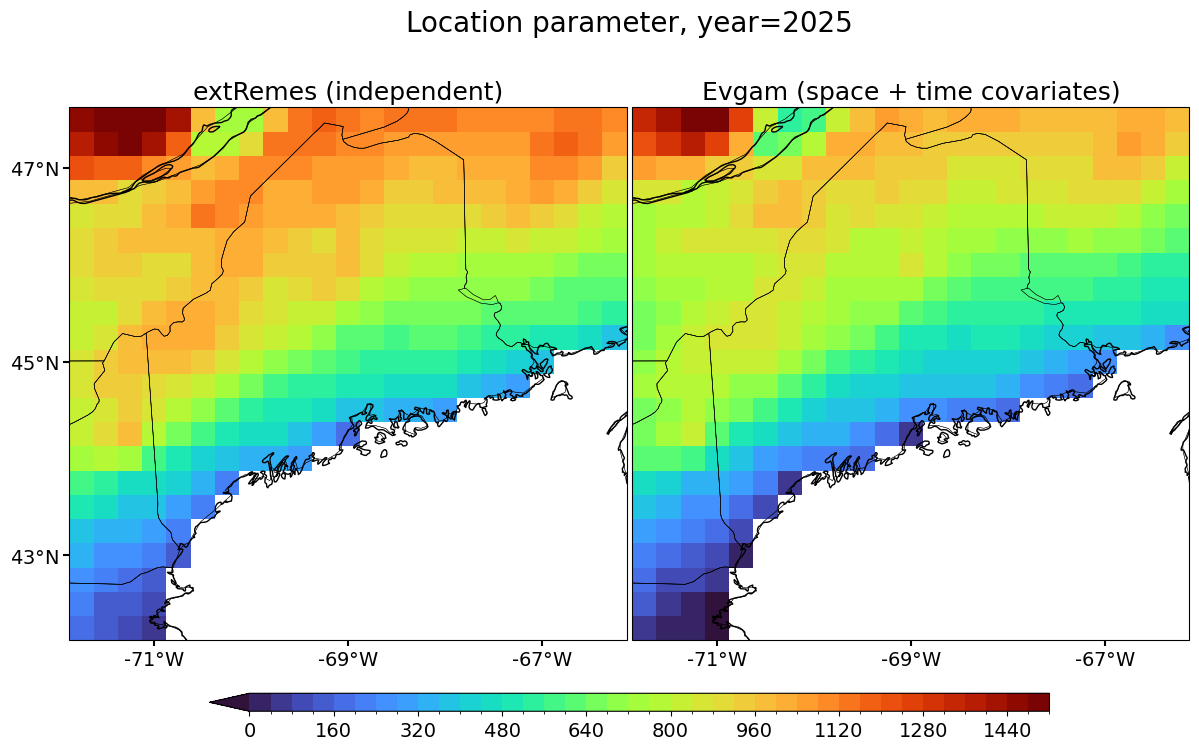

In [47]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tloc[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,1540,40),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Location parameter, year={yeare}',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter, year=1941')

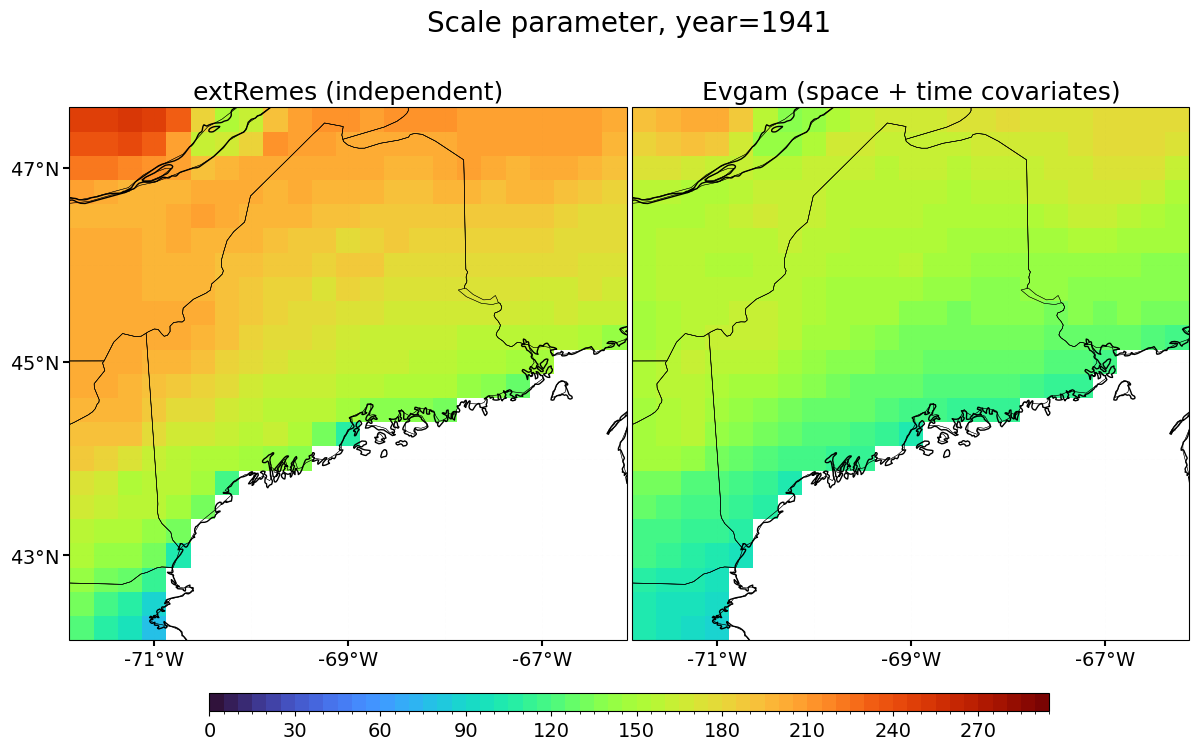

In [48]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tscale[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,300,5),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Scale parameter, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter, year=2025')

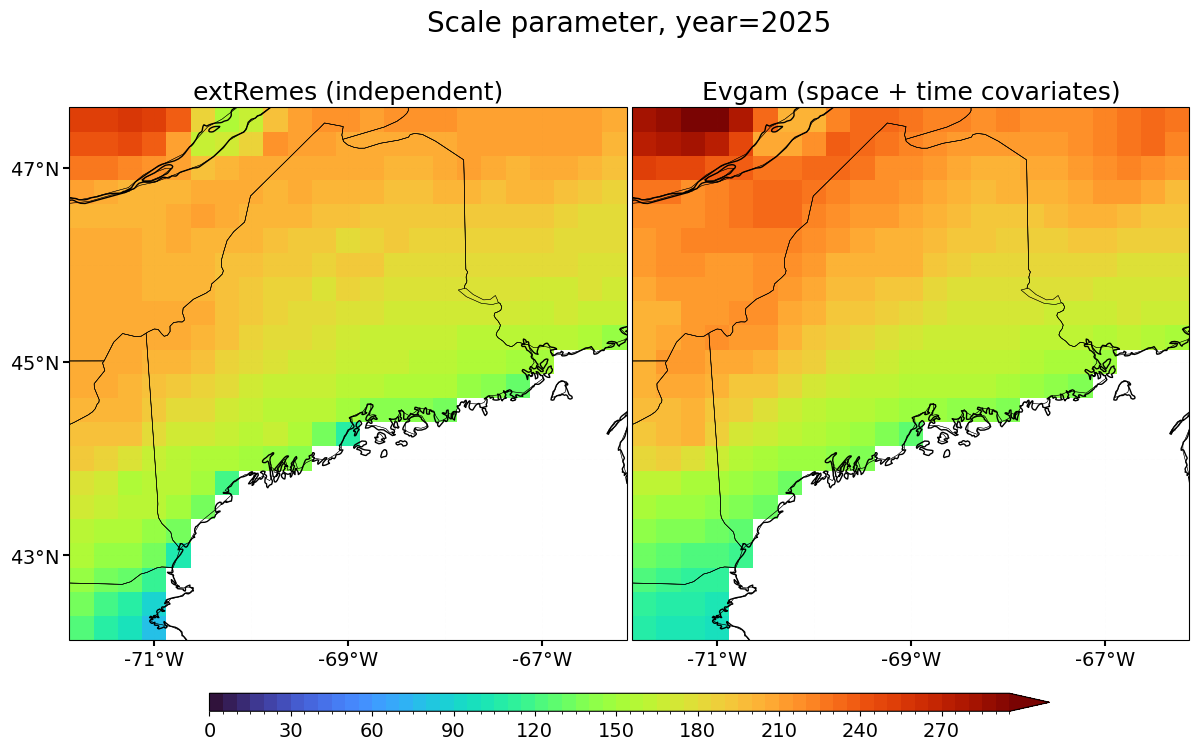

In [49]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tscale[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,300,5),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Scale parameter, year={yeare}',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=1941')

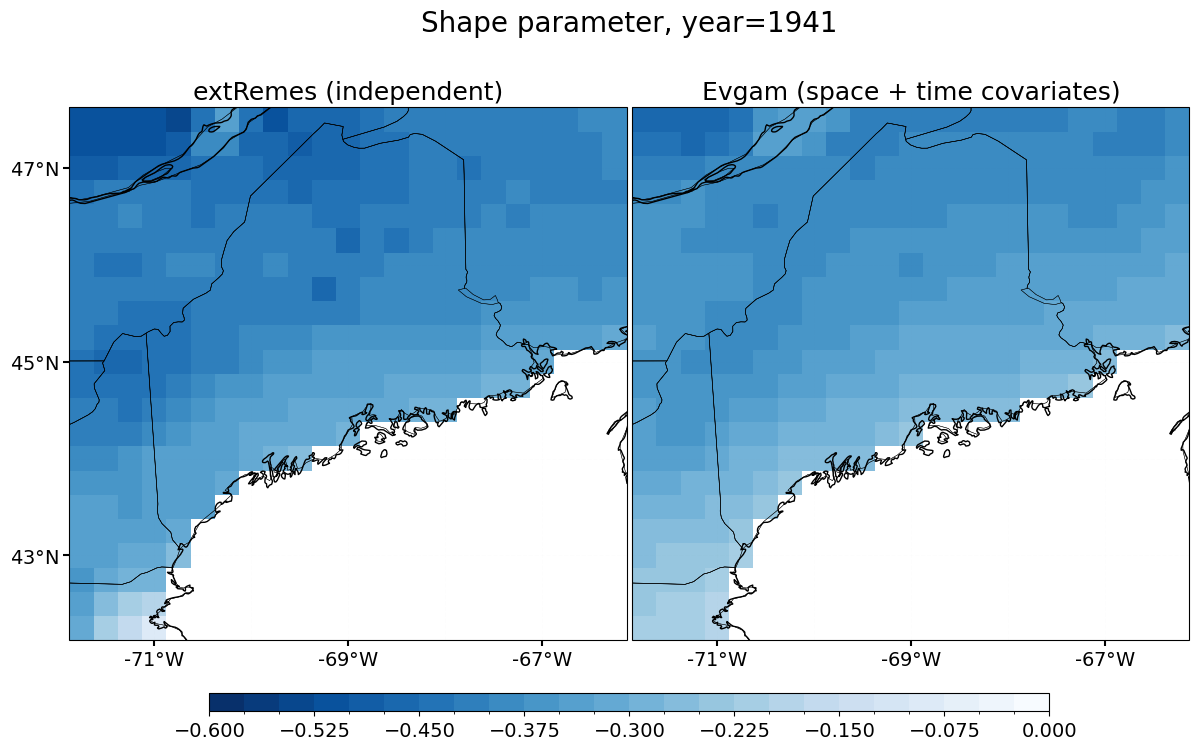

In [50]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='Blues_r',levels=np.arange(-0.6,0.025,0.025),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Shape parameter, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=2025')

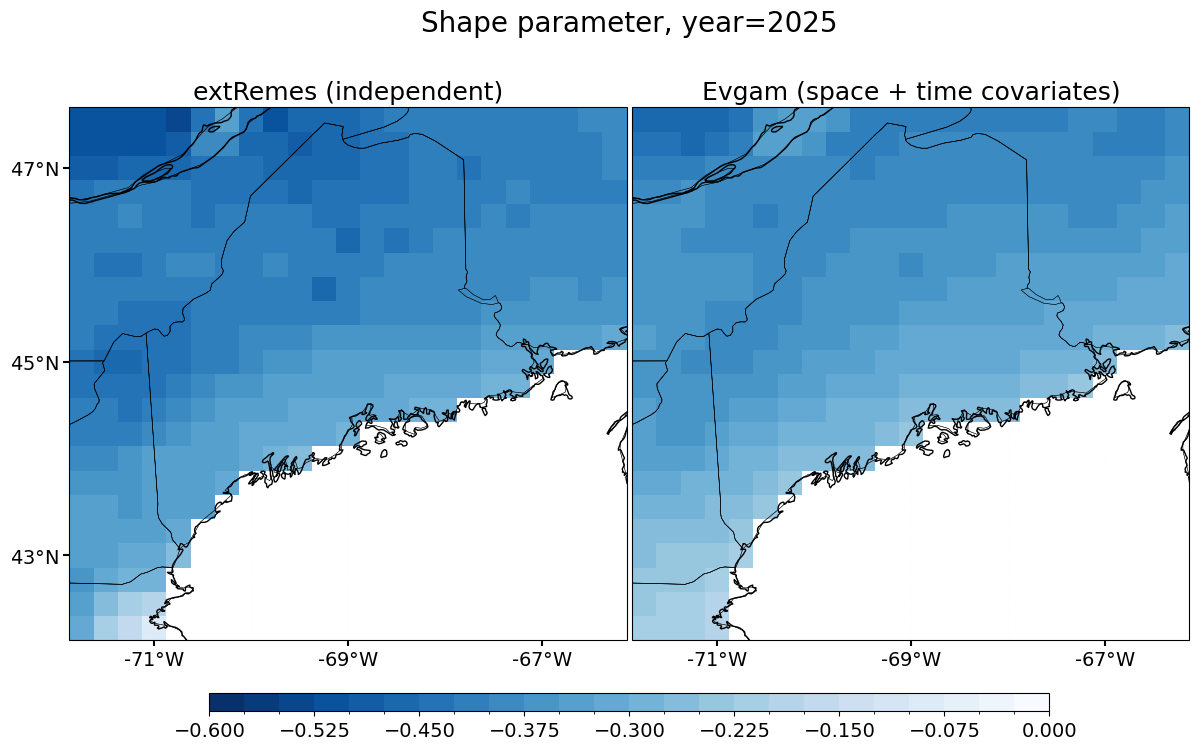

In [51]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tshape[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix],cmap='Blues_r',levels=np.arange(-0.6,0.025,0.025),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')


  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

ax[0].set_yticks(ax[0].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
ax[0].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[0].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Shape parameter, year={yeare}',fontsize=20)  

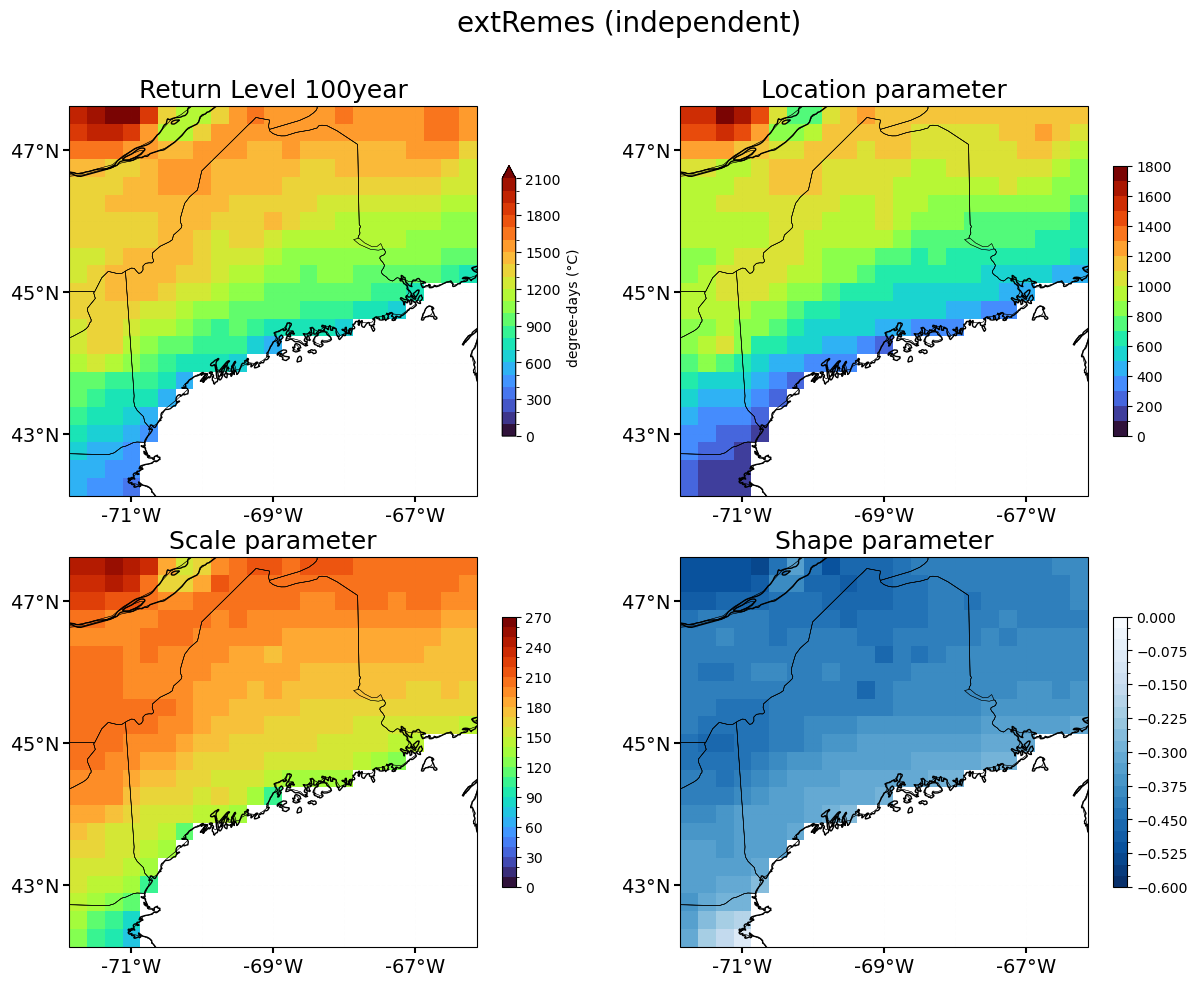

In [52]:
iyear = 1941
it=0

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1,left=0.1, right=0.9,wspace=.2,hspace=0.,top=0.92)
ax = ax.flatten()
Trl100[it].sel(time=iyear).plot.pcolormesh(ax=ax[0],cmap='turbo',levels=np.arange(0,2200,100),cbar_kwargs={'label':units,'shrink':0.6})
ax[0].set_title(f'Return Level 100year',fontsize=18)  
Tloc[it].sel(time=iyear).plot.pcolormesh(ax=ax[1],cmap='turbo',levels=np.arange(0,1900,100),cbar_kwargs={'label':'','shrink':0.6})
ax[1].set_title(f'Location parameter',fontsize=18)  
Tscale[it].sel(time=iyear).plot.pcolormesh(ax=ax[2],cmap='turbo',levels=np.arange(0,280,10),cbar_kwargs={'label':'','shrink':0.6})
ax[2].set_title(f'Scale parameter',fontsize=18)  
Tshape[it].sel(time=iyear).plot.pcolormesh(ax=ax[3],cmap='Blues_r',levels=np.arange(-0.6,0.025,0.025),cbar_kwargs={'label':'','shrink':0.6})
ax[3].set_title(f'Shape parameter',fontsize=18)  
####
for ix in range(0,4): 
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
#
plt.suptitle(f'{Tlabels[it]}',fontsize=20)  
plt.show()

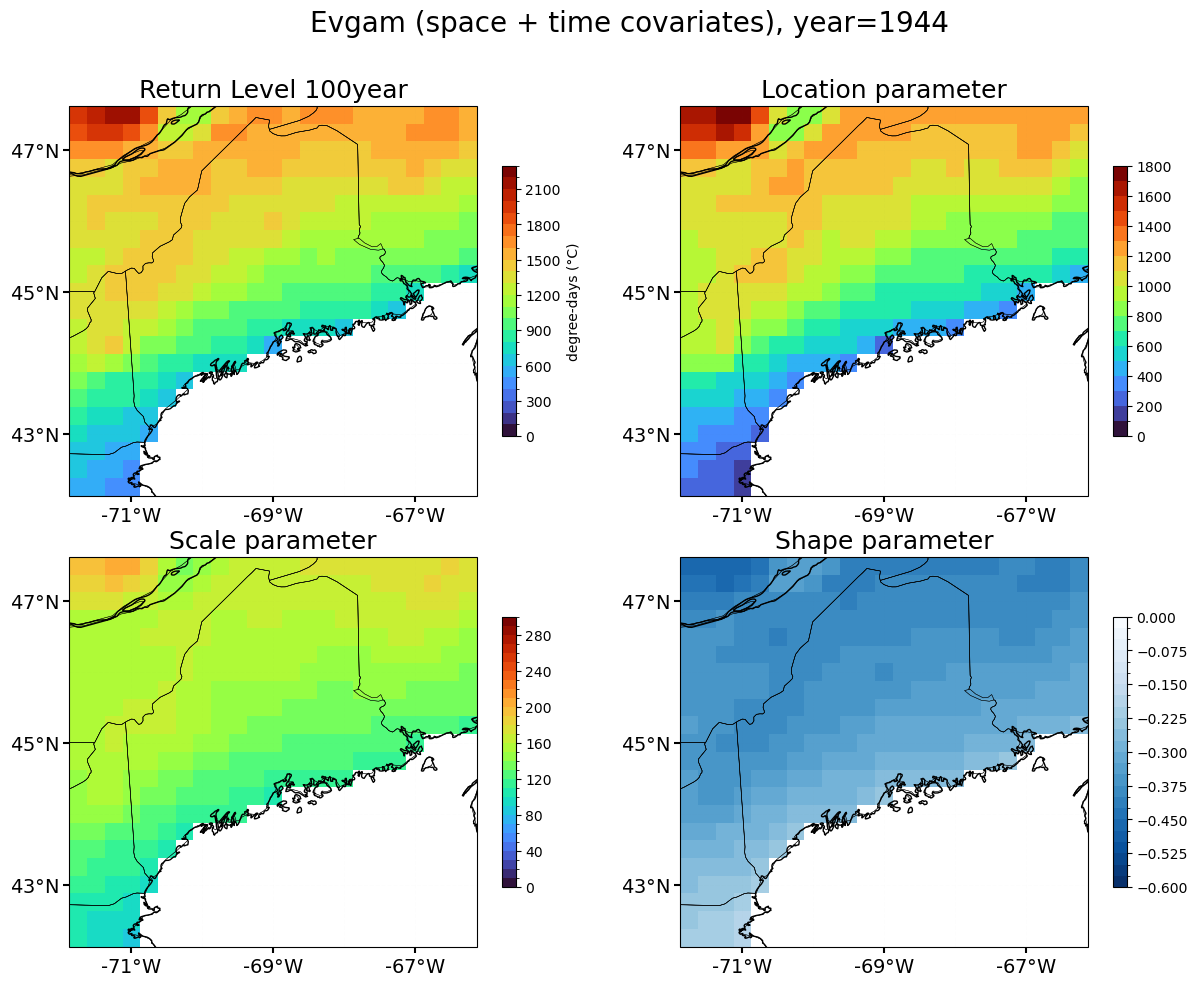

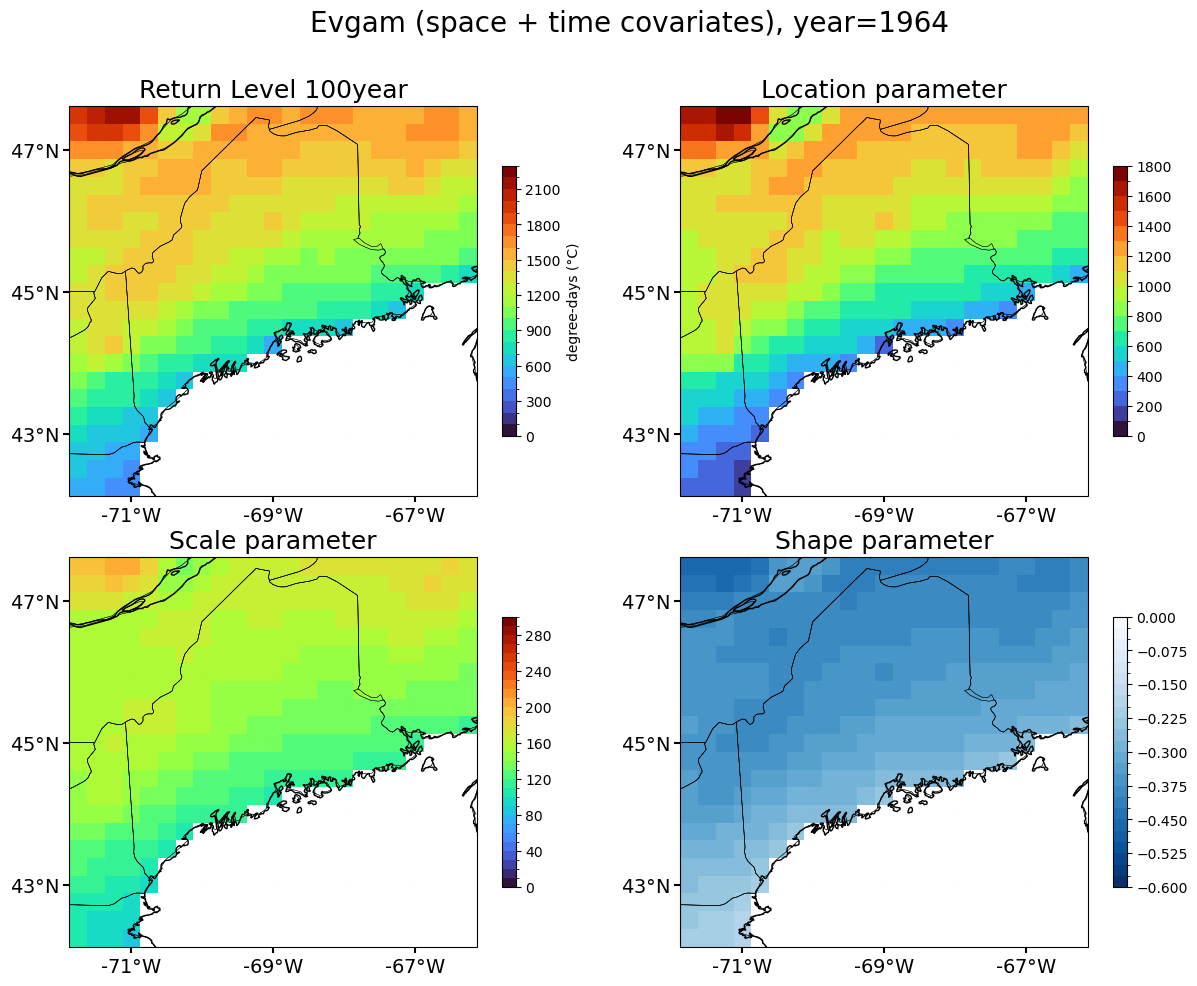

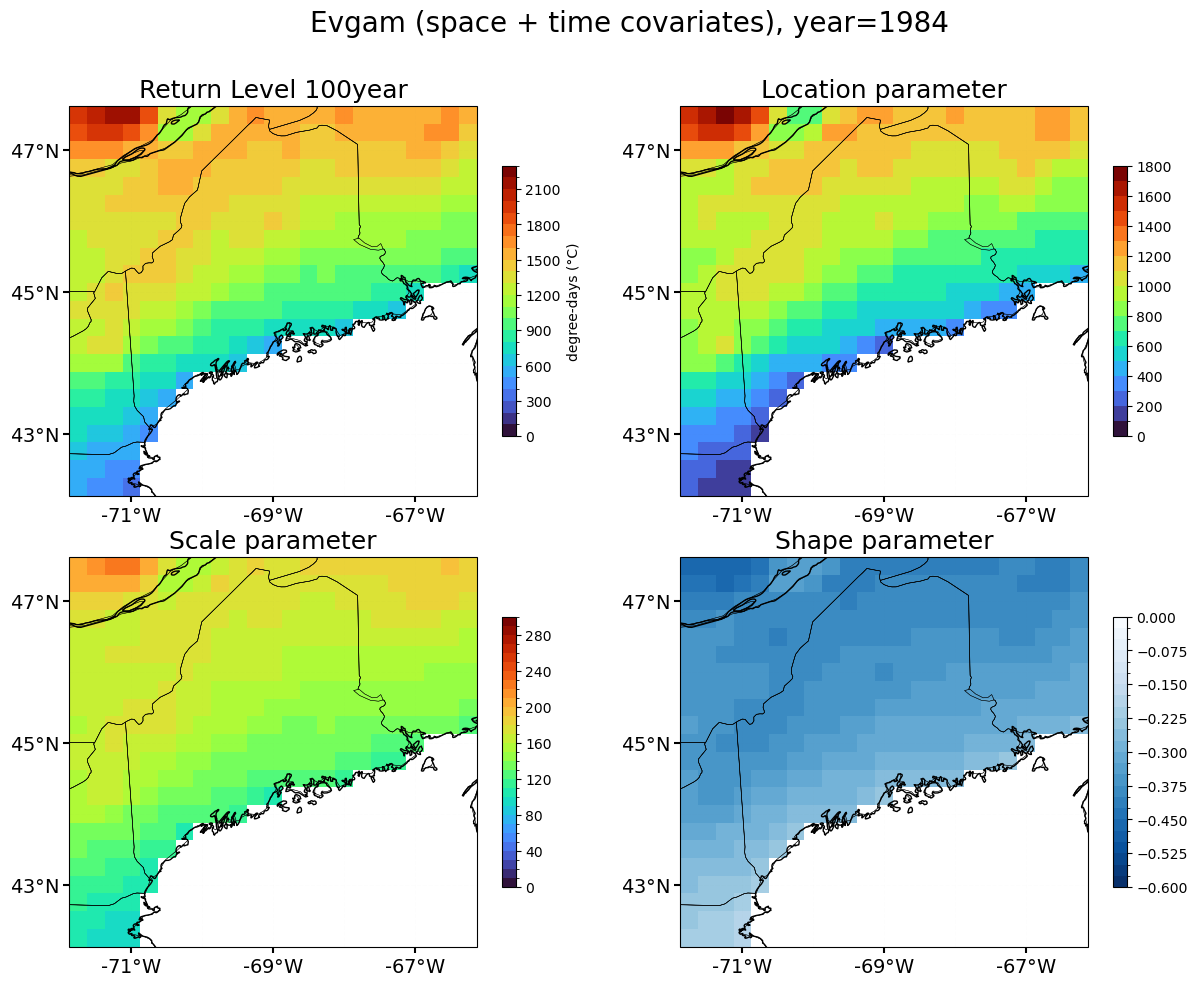

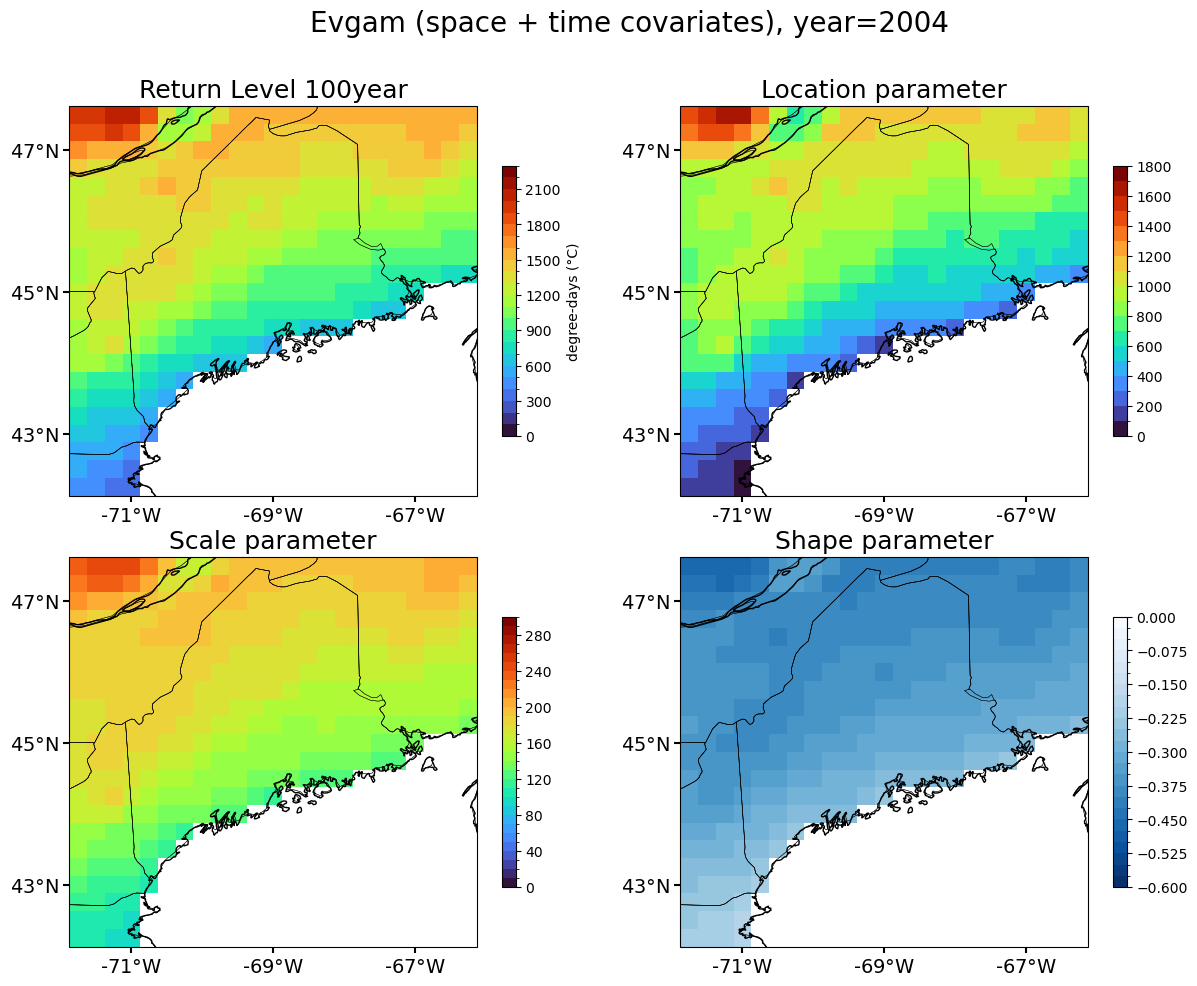

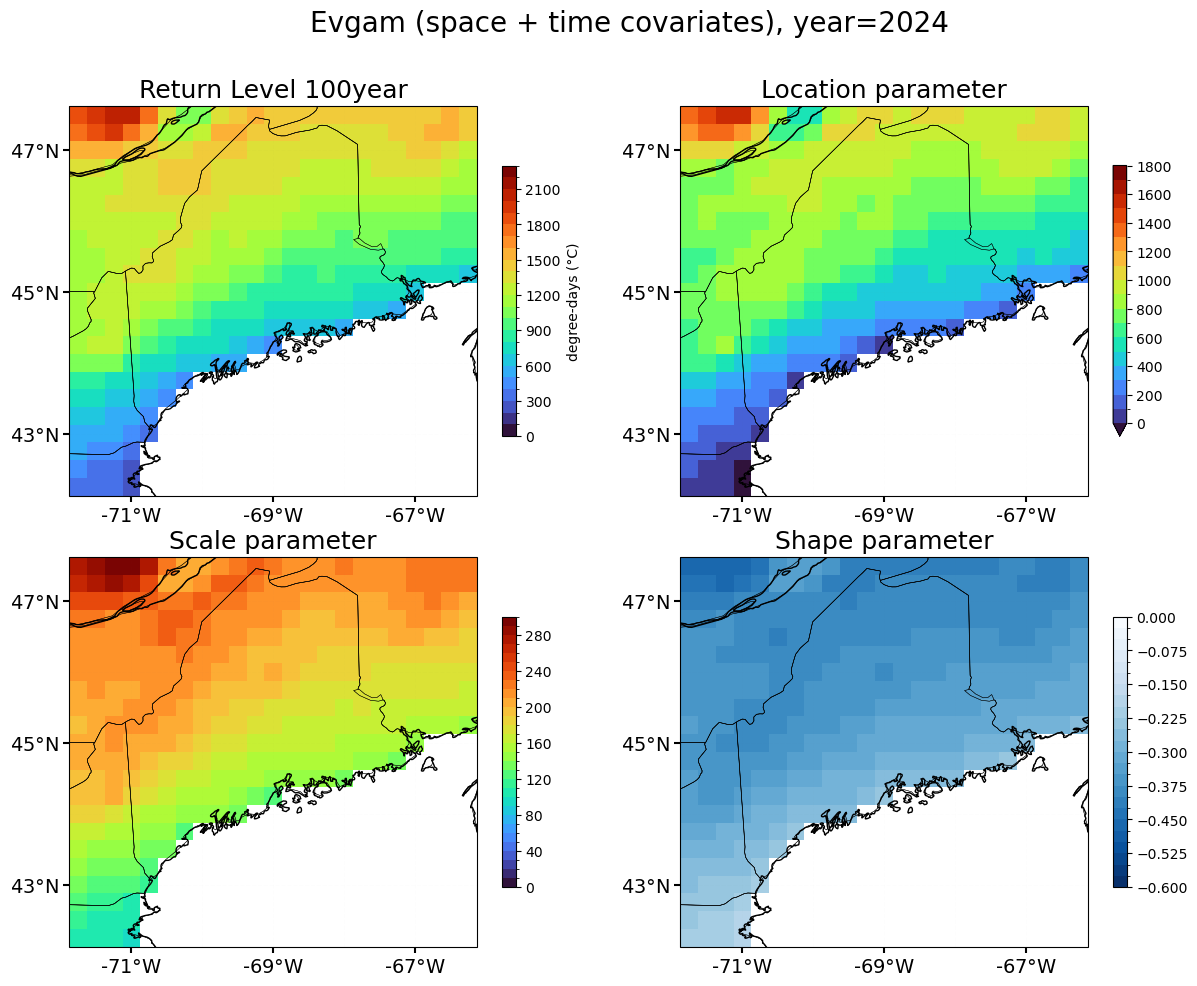

In [53]:
Tyears = [1944,1964,1984,2004,2024]
it = 1
proj=ccrs.PlateCarree()

for iyear in Tyears:

  fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
  plt.subplots_adjust(bottom=0.1,left=0.1, right=0.9,wspace=.2,hspace=0.,top=0.92)
  ax = ax.flatten()
  Trl100[it].sel(time=iyear).plot.pcolormesh(ax=ax[0],cmap='turbo',levels=np.arange(0,2400,100),cbar_kwargs={'label':units,'shrink':0.6})
  ax[0].set_title(f'Return Level 100year',fontsize=18)  
  Tloc[it].sel(time=iyear).plot.pcolormesh(ax=ax[1],cmap='turbo',levels=np.arange(0,1900,100),cbar_kwargs={'label':'','shrink':0.6})
  ax[1].set_title(f'Location parameter',fontsize=18)  
  Tscale[it].sel(time=iyear).plot.pcolormesh(ax=ax[2],cmap='turbo',levels=np.arange(0,310,10),cbar_kwargs={'label':'','shrink':0.6})
  ax[2].set_title(f'Scale parameter',fontsize=18)  
  Tshape[it].sel(time=iyear).plot.pcolormesh(ax=ax[3],cmap='Blues_r',levels=np.arange(-0.6,0.025,0.025),cbar_kwargs={'label':'','shrink':0.6})
  ax[3].set_title(f'Shape parameter',fontsize=18)  
  ####
  for ix in range(0,4): 
    grd = ax[ix].gridlines(
        draw_labels=False, 
        color='gray', alpha=0.01, linestyle='--')

    ax[ix].set_xlabel('')
    ax[ix].set_ylabel('')
    ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
    ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
    ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
    ax[ix].coastlines()
  #
  plt.suptitle(f'{Tlabels[it]}, year={iyear}',fontsize=20)  
  plt.show()